#### Named Entity Recognition

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
import pandas
book=pd.read_csv("amazon_review.csv")
book

,Unnamed: 0,cust_name,rating,review_contents
0,0,Ajay Kumar,1.0 out of 5 stars,Touch quility not goodCamera quility not good
1,1,Viswanath,1.0 out of 5 stars,"Distorted , voice quality bad . Cannot even re..."
2,2,anand methi,1.0 out of 5 stars,Touch screen not working as i have received us...
3,3,shubham gupta,1.0 out of 5 stars,I am purchess this mobile last month but this ...
4,4,Akshay,4.0 out of 5 stars,This phone is value for money and packed with ...
5,5,Amazon Customer,2.0 out of 5 stars,Worst Smart Phone in this segment pathetic bat...
6,6,Gavin,5.0 out of 5 stars,I've been using Oppo and so I like it . It's a...
7,7,Roy_Trusted,5.0 out of 5 stars,"So far it's working very nicely, fingerprint s..."
8,8,Prashant,3.0 out of 5 stars,For reader who would to buy smartphone OPPO A1...
9,9,vandana,1.0 out of 5 stars,Very bad vCamera not expected


In [5]:
book = [review_contents.strip() for review_contents in book.review_contents] # remove both the leading and the trailing characters
book = [review_contents for review_contents in book if review_contents] # removes empty strings, because they are considered in Python as False
book[0:10]

['Touch quility not goodCamera quility not good',
 'Distorted , voice quality bad . Cannot even retrun now.',
 'Touch screen not working as i have received used phone . Very bad seller',
 "I am purchess this mobile last month but this mobile not work properly this device is very hang and heating problem this mobile is waste of money.. don't buy thi device.",
 'This phone is value for money and packed with all that you need out of a smart phone in this range.Battery performance is satisfactory.Cons: At time’s the touch screen does not respond quickly as time lag is experienced between a finger gesture and response from the screen.AI of the camera delivers artificial pictures.Conclusion: This is a good buying option in this range must go for it.',
 'Worst Smart Phone in this segment pathetic battery life and camera quality is worst than what we used to have in old smart phones 8 years backOPPO is frustating already planning to exchange it with some other phone',
 "I've been using Oppo an

In [14]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = book[8]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [15]:
one_block

'For reader who would to buy smartphone OPPO A15s is just a okay phone but not value for money, it could be more better cause most of the people who have trusted OPPO for there quality, battery backups & camera purpose. After using it I would like to say my honest opinions is that it has some issues like battery support for fast charging problem, Camera quality very low not well to satisfy user, some reboot issue and there other fault like in camera and videos taking.'

In [17]:
for token in doc_block[0:20]:
    print(token, token.pos_)#Words and parts of speech

For ADP
reader NOUN
who PRON
would AUX
to PART
buy VERB
smartphone NOUN
OPPO ADJ
A15s NOUN
is AUX
just ADV
a DET
okay ADJ
phone NOUN
but CCONJ
not PART
value NOUN
for ADP
money NOUN
, PUNCT


In [18]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['value', 'money', 'cause', 'people', 'trusted', 'OPPO', 'quality', 'battery', 'backups', 'camera', 'purpose', 'using', 'like', 'say', 'opinions', 'has', 'issues', 'battery', 'support', 'charging']


In [20]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:30]

,word,count
0,quality,2
1,battery,2
2,camera,2
3,reader,1
4,buy,1
5,smartphone,1
6,a15s,1
7,phone,1
8,value,1
9,money,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

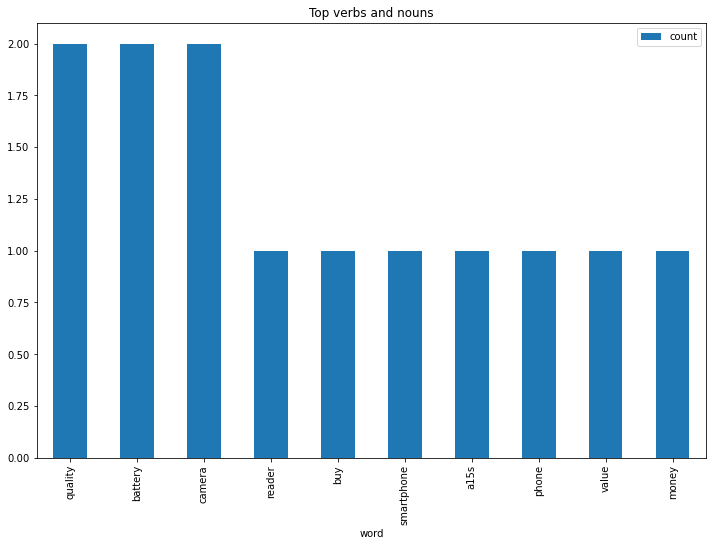

In [21]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [22]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [23]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("amazon_review.csv")
book = [review_contents.strip() for review_contents in book.review_contents] # remove both the leading and the trailing characters
book = [review_contents for review_contents in book if review_contents] # removes empty strings, because they are considered in Python as False
book[0:10]

['Touch quility not goodCamera quility not good',
 'Distorted , voice quality bad . Cannot even retrun now.',
 'Touch screen not working as i have received used phone . Very bad seller',
 "I am purchess this mobile last month but this mobile not work properly this device is very hang and heating problem this mobile is waste of money.. don't buy thi device.",
 'This phone is value for money and packed with all that you need out of a smart phone in this range.Battery performance is satisfactory.Cons: At time’s the touch screen does not respond quickly as time lag is experienced between a finger gesture and response from the screen.AI of the camera delivers artificial pictures.Conclusion: This is a good buying option in this range must go for it.',
 'Worst Smart Phone in this segment pathetic battery life and camera quality is worst than what we used to have in old smart phones 8 years backOPPO is frustating already planning to exchange it with some other phone',
 "I've been using Oppo an

In [13]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [27]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]#Sentence tokenization

["Worst Smart Phone in this segment pathetic battery life and camera quality is worst than what we used to have in old smart phones 8 years backOPPO is frustating already planning to exchange it with some other phone I've been using Oppo and so I like it .",
 "It's a decent handset for an affordable price.",
 "I'm not a heavy user.",
 'So this phone does he job for me.',
 "It's comfortable in the hand and is sleek.",
 "So far it's working very nicely, fingerprint sensor is fast, camera quality is nice for me as we all know how oppo stands out incase of camera quality.Cons - idk yetPackaging was very bad not upto the mark , as u r sending a phone there should have been slight precautions taken while sending the package, it was too lose and phone box was literally moving from one side to another badly.",
 'For reader who would to buy smartphone OPPO A15s is just a okay phone but not value for money, it could be more better cause most of the people who have trusted OPPO for there quality,

In [28]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Touch quility not goodCamera quility not good ...
1,Cannot even retrun now.
2,Touch screen not working as i have received us...
3,Very bad seller I am purchess this mobile last...
4,This phone is value for money and packed with ...
5,Worst Smart Phone in this segment pathetic bat...
6,It's a decent handset for an affordable price.
7,I'm not a heavy user.
8,So this phone does he job for me.
9,It's comfortable in the hand and is sleek.


In [29]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [30]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [31]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [32]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [33]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    13
1     4
2    11
3    34
4    66
5    48
6     8
7     5
8     8
9     8
Name: word_count, dtype: int64

In [34]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
0,Touch quility not goodCamera quility not good ...,0,13
1,Cannot even retrun now.,0,4
2,Touch screen not working as i have received us...,0,11
6,It's a decent handset for an affordable price.,0,8
7,I'm not a heavy user.,0,5
8,So this phone does he job for me.,0,8
11,For reader who would to buy smartphone OPPO A1...,1,41
9,It's comfortable in the hand and is sleek.,2,8
4,This phone is value for money and packed with ...,3,66
12,After using it I would like to say my honest o...,8,46


In [35]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    14.000000
mean     -0.214286
std       3.468065
min      -6.000000
25%      -2.250000
50%       0.000000
75%       0.750000
max       8.000000
Name: sentiment_value, dtype: float64

In [36]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Touch quility not goodCamera quility not good ...,0,13
1,Cannot even retrun now.,0,4
2,Touch screen not working as i have received us...,0,11
3,Very bad seller I am purchess this mobile last...,-6,34
5,Worst Smart Phone in this segment pathetic bat...,-5,48


In [37]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count


In [38]:
sent_df['index']=range(0,len(sent_df))

C:\Users\shiwam\Anaconda_shi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

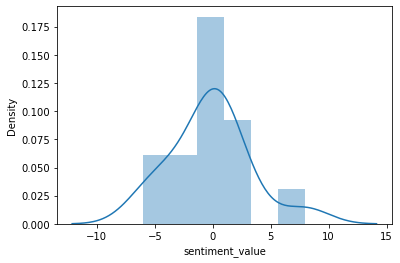

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

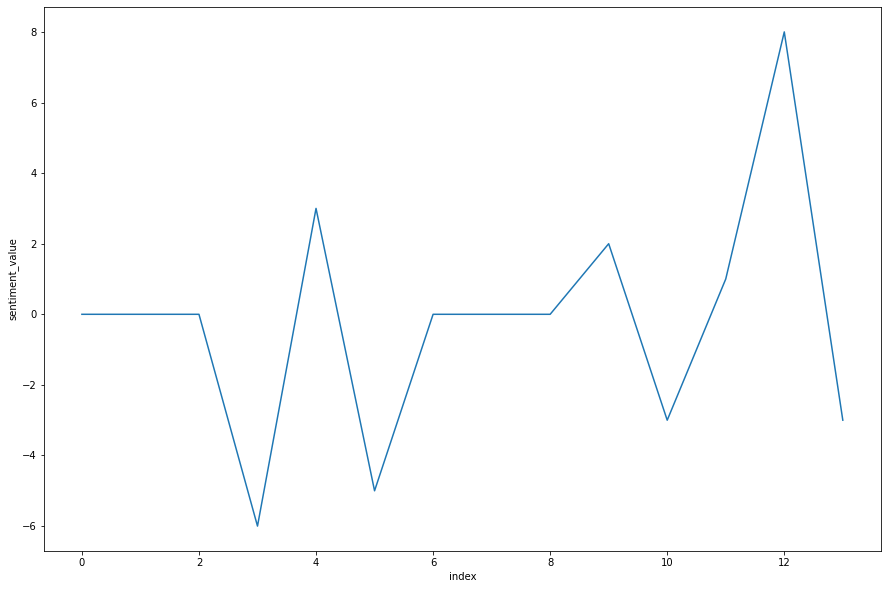

In [40]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

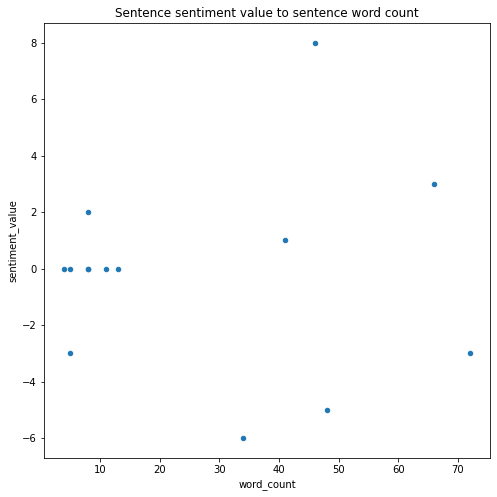

In [41]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')